<a href="https://colab.research.google.com/github/SHAIKYASIR/Fraudulent-transaction-Detection/blob/main/AI%20MODEL%20FOR%20FRAUDULENT%20TRANSACTION%20DETECTION%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/drive/MyDrive/HSBC HACK/train_hsbc_df.csv'
df = pd.read_csv(file_path)
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
1,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
2,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
3,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
4,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1


In [ ]:
file_path = '/content/drive/MyDrive/HSBC HACK/train_hsbc_df.csv'
original_data = pd.read_csv(file_path)

In [ ]:
cleaned_data = original_data.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)

<ipython-input-8-9f86192a45bd>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_data = original_data.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)


In [ ]:
cleaned_data['age'] = pd.to_numeric(cleaned_data['age'], errors='coerce')
cleaned_data['age'].fillna(cleaned_data['age'].median(), inplace=True)


In [ ]:
preprocessed_data = pd.get_dummies(cleaned_data, columns=['gender', 'category', 'zipcodeOri', 'zipMerchant'])


In [ ]:
scaler = StandardScaler()
preprocessed_data['amount'] = scaler.fit_transform(preprocessed_data[['amount']])

In [ ]:
import os

preprocessed_file_path = '/mnt/data/preprocessed_hsbc_data.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(preprocessed_file_path), exist_ok=True)

preprocessed_data.to_csv(preprocessed_file_path, index=False)

In [ ]:
import pandas as pd

# Load the preprocessed dataset
preprocessed_data = pd.read_csv('/mnt/data/preprocessed_hsbc_data.csv')

# Display the first few rows of the preprocessed data
print(preprocessed_data.head())


   step     customer  age     merchant    amount  fraud  gender_E  gender_F  \
0     0   C583110837  3.0   M480139044  0.056872      1     False     False   
1     0  C1332295774  3.0   M480139044  2.568943      1     False     False   
2     0  C1160421902  3.0   M857378720  1.240658      1     False     False   
3     0   C966214713  3.0   M857378720  2.684669      1     False     False   
4     0  C1450140987  4.0  M1198415165  1.633192      1     False      True   

   gender_M  gender_U  ...  category_es_hyper  category_es_leisure  \
0      True     False  ...              False                False   
1      True     False  ...              False                False   
2      True     False  ...              False                False   
3      True     False  ...              False                False   
4     False     False  ...              False                False   

   category_es_otherservices  category_es_sportsandtoys  category_es_tech  \
0                      Fals

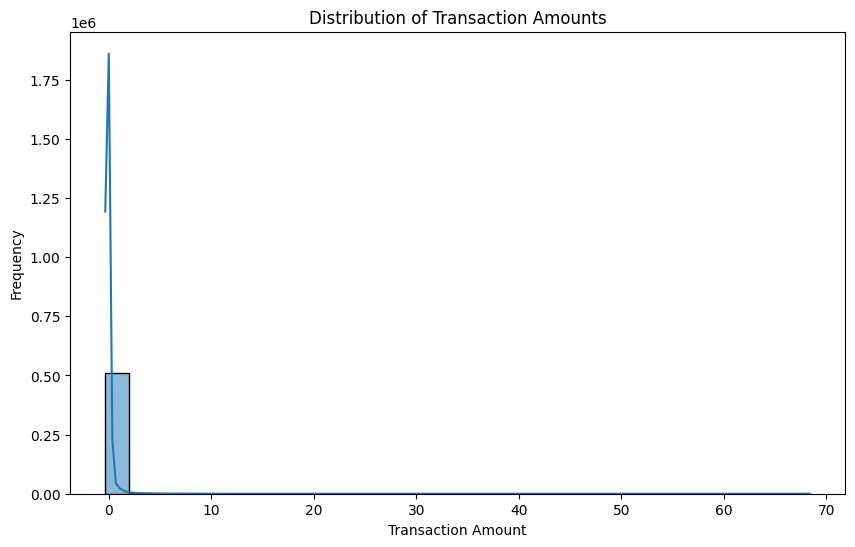

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
preprocessed_data = pd.read_csv('/mnt/data/preprocessed_hsbc_data.csv')
plt.figure(figsize=(10, 6))
sns.histplot(preprocessed_data['amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
preprocessed_data['amount_less_than_10'] = (preprocessed_data['amount'] < 10).astype(int)
print(preprocessed_data.head())

   step     customer  age     merchant    amount  fraud  gender_E  gender_F  \
0     0   C583110837  3.0   M480139044  0.056872      1     False     False   
1     0  C1332295774  3.0   M480139044  2.568943      1     False     False   
2     0  C1160421902  3.0   M857378720  1.240658      1     False     False   
3     0   C966214713  3.0   M857378720  2.684669      1     False     False   
4     0  C1450140987  4.0  M1198415165  1.633192      1     False      True   

   gender_M  gender_U  ...  category_es_leisure  category_es_otherservices  \
0      True     False  ...                False                      False   
1      True     False  ...                False                      False   
2      True     False  ...                False                      False   
3      True     False  ...                False                      False   
4     False     False  ...                False                      False   

   category_es_sportsandtoys  category_es_tech  category

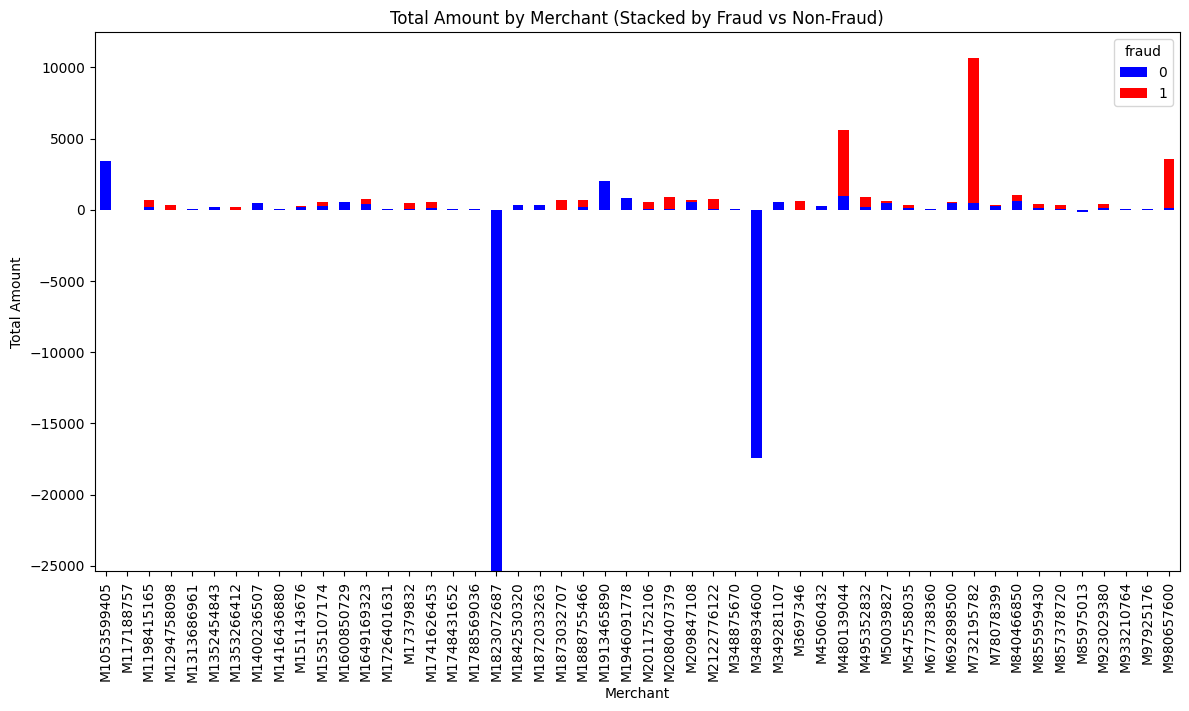

In [ ]:
import matplotlib.pyplot as plt

# Grouping the data by 'fraud' and 'merchant' columns and summing the 'amount' for each group
var = preprocessed_data.groupby(['merchant', 'fraud']).amount.sum().unstack()

# Creating the figure and axis
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1, 1, 1)

# Plotting the data as a stacked bar chart
var.plot(kind='bar', stacked=True, ax=ax1, color=['blue', 'red'])

# Setting the title and labels
ax1.set_title("Total Amount by Merchant (Stacked by Fraud vs Non-Fraud)")
ax1.set_xlabel('Merchant')
ax1.set_ylabel('Total Amount')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


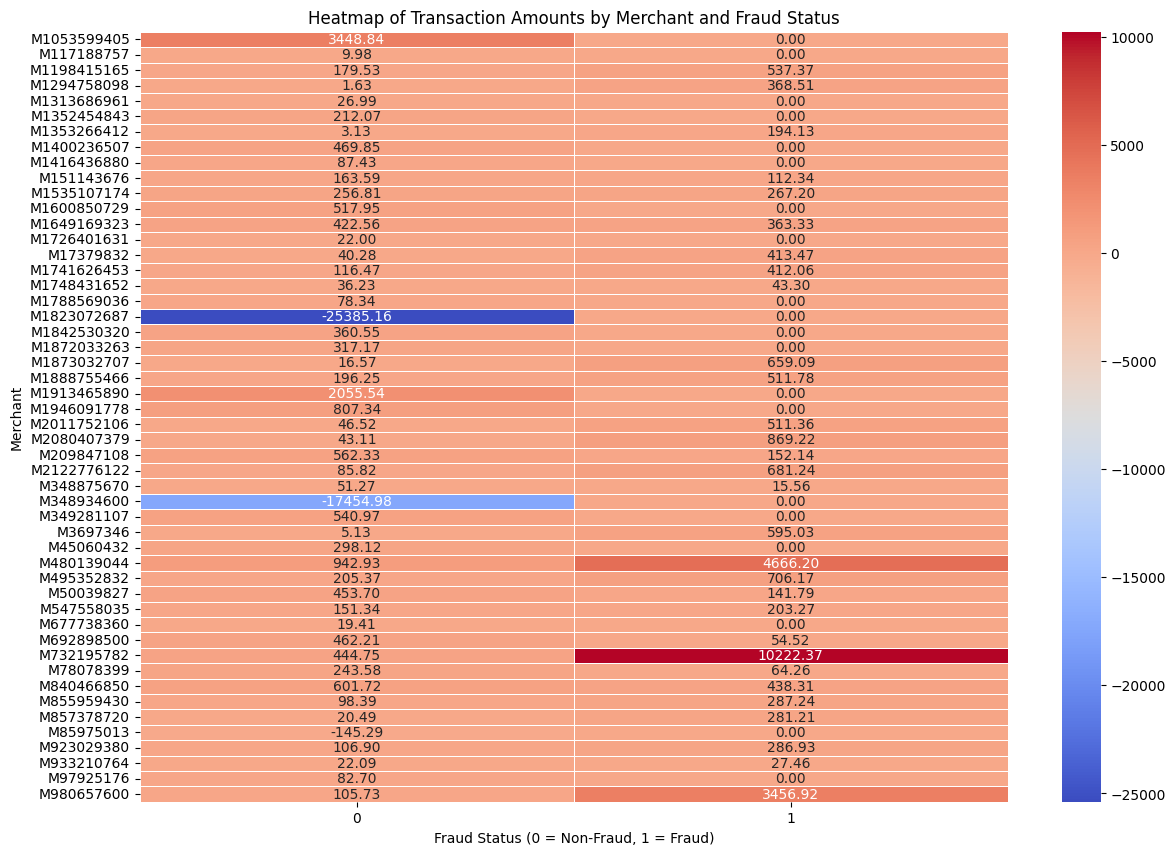

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by 'fraud' and 'merchant' columns and summing the 'amount' for each group
var = preprocessed_data.groupby(['merchant', 'fraud']).amount.sum().unstack().fillna(0)

# Creating the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(var, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

# Setting the title and labels
plt.title("Heatmap of Transaction Amounts by Merchant and Fraud Status")
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Merchant')

# Display the plot
plt.show()



In [ ]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Selecting relevant features for the model
features = preprocessed_data.drop(columns=['fraud', 'customer'])
target = preprocessed_data['fraud']

# Converting categorical features to numerical using one-hot encoding
features_encoded = pd.get_dummies(features)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)


In [ ]:
from xgboost import XGBClassifier

# Initializing the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Training the model
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:42:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Fraud-related cells in the confusion matrix
fraud_actual_fraud_pred = conf_matrix[1, 1]  # True Positives
non_fraud_actual_fraud_pred = conf_matrix[0, 1]  # False Positives

# Print out the values
print(f'Actual Fraud, Predicted Fraud (True Positives): {fraud_actual_fraud_pred}')
print(f'Actual Non-Fraud, Predicted Fraud (False Positives): {non_fraud_actual_fraud_pred}')


Actual Fraud, Predicted Fraud (True Positives): 1440
Actual Non-Fraud, Predicted Fraud (False Positives): 220


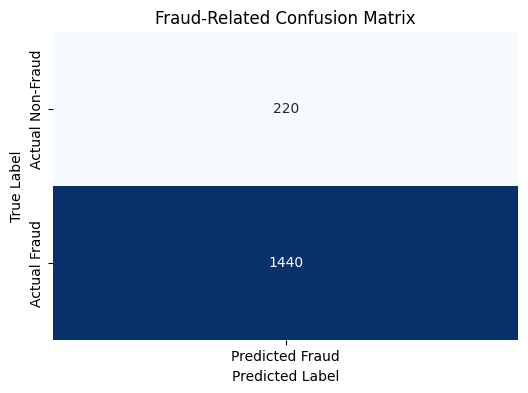

In [ ]:
# Create a smaller confusion matrix focusing on fraud labels
fraud_matrix = np.array([[conf_matrix[0, 1]], [conf_matrix[1, 1]]])

# Plot the fraud-related part of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(fraud_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fraud'], yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Fraud-Related Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:

fraud_conf_matrix = np.array([[conf_matrix[0, 1]], [conf_matrix[1, 1]]])
fraud_df = pd.DataFrame({
    'Actual Non-Fraud, Predicted Fraud (False Positives)': [conf_matrix[0, 1]],
    'Actual Fraud, Predicted Fraud (True Positives)': [conf_matrix[1, 1]]
})

fraud_df


,"Actual Non-Fraud, Predicted Fraud (False Positives)","Actual Fraud, Predicted Fraud (True Positives)"
0,220,1440


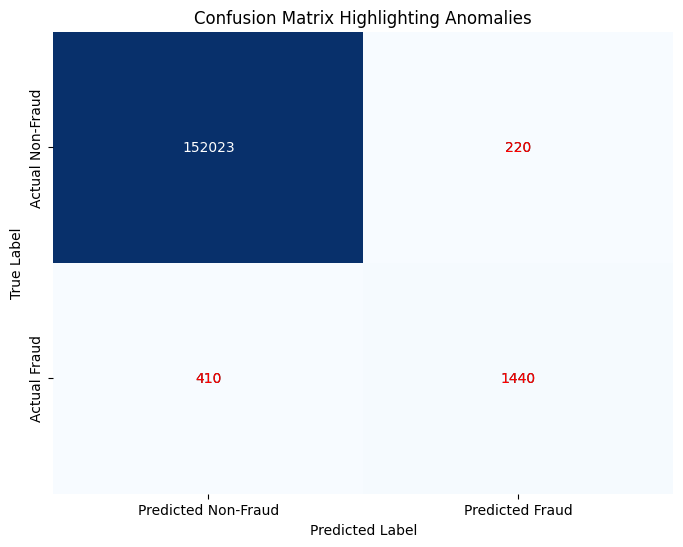

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from the previous model evaluation

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix Highlighting Anomalies')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding labels for easier interpretation
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i == 1 or j == 1:  # Highlighting rows and columns related to fraud detection
            plt.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}',
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='red' if conf_matrix[i, j] > 0 else 'black')

plt.show()


In [ ]:
# Identifying the anomalies in the test set
anomalies = X_test[y_pred == 1]  # Predicted anomalies
print("Number of anomalies detected:", len(anomalies))


Number of anomalies detected: 1660


In [ ]:
# Combine test set features with predictions and actual values
X_test['actual'] = y_test
X_test['predicted'] = y_pred

# Filter anomalies (True Positives and False Positives)
anomalies = X_test[(X_test['predicted'] == 1)]

# Highlighting False Positives and True Positives
false_positives = anomalies[anomalies['actual'] == 0]
true_positives = anomalies[anomalies['actual'] == 1]

# Display some of the anomalies
print("False Positives:")
print(false_positives.head())
print("\nTrue Positives:")
print(true_positives.head())

# Save anomalies to a CSV file for further analysis
anomalies.to_csv('/mnt/data/anomalies_detected.csv', index=False)


False Positives:
        step  age     merchant    amount  gender_E  gender_F  gender_M  \
35802     13  3.0   M480139044  1.723638     False      True     False   
157006    61  4.0   M480139044  1.659904     False      True     False   
344605   126  3.0  M2122776122  0.400014     False      True     False   
135595    53  3.0   M923029380  1.656229     False      True     False   
401965   144  2.0  M2122776122  2.113572     False     False      True   

        gender_U  category_es_barsandrestaurants  category_es_contents  ...  \
35802      False                           False                 False  ...   
157006     False                           False                 False  ...   
344605     False                           False                 False  ...   
135595     False                           False                 False  ...   
401965     False                           False                 False  ...   

        category_es_sportsandtoys  category_es_tech  \
35802   

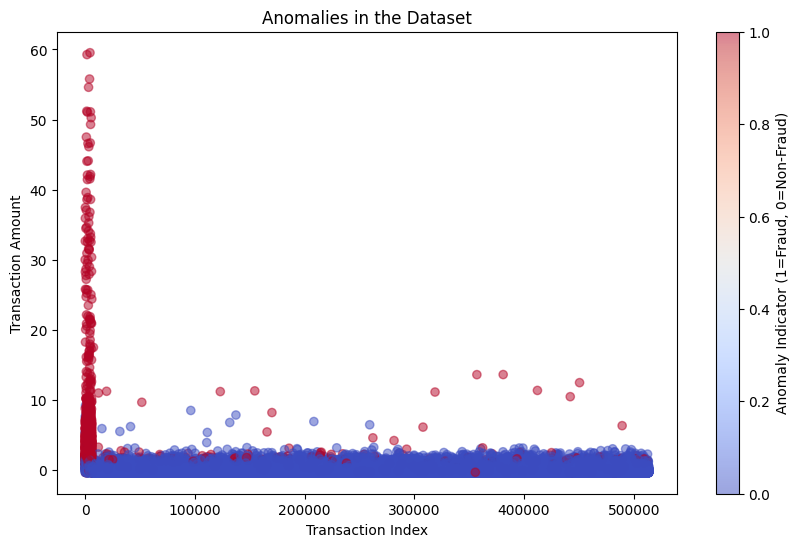

In [ ]:
# Plot the anomalies to see where they lie in the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, X_test['amount'], c=X_test['predicted'], cmap='coolwarm', alpha=0.5)
plt.title('Anomalies in the Dataset')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Anomaly Indicator (1=Fraud, 0=Non-Fraud)')
plt.show()


In [ ]:
# Assuming X_test has the transaction names and y_pred contains the model's predictions

# Combine the test set features with predictions and actual values
X_test['actual'] = y_test
X_test['predicted'] = y_pred

# Filter anomalies (True Positives and False Positives)
anomalies = X_test[(X_test['predicted'] == 1)]

# Display the first few rows of anomalies for reference
print(anomalies.head())


      step  age     merchant    amount  gender_E  gender_F  gender_M  \
2226    65  6.0   M480139044  9.188409     False      True     False   
2938    85  2.0   M980657600  3.403223     False      True     False   
2940    85  1.0   M980657600  1.374132     False      True     False   
4301   125  2.0   M480139044  0.931490     False      True     False   
1358    39  2.0  M2011752106  4.378058     False      True     False   

      gender_U  category_es_barsandrestaurants  category_es_contents  ...  \
2226     False                           False                 False  ...   
2938     False                           False                 False  ...   
2940     False                           False                 False  ...   
4301     False                           False                 False  ...   
1358     False                           False                 False  ...   

      category_es_sportsandtoys  category_es_tech  category_es_transportation  \
2226                   

In [ ]:
#  'category_'
category_columns = [col for col in anomalies.columns if col.startswith('category_')]



In [ ]:
if category_columns:
    anomalies_by_category = anomalies[category_columns].sum()  # Sum across one-hot encoded columns
    print(anomalies_by_category)


In [ ]:

anomalies = X_test[(X_test['predicted'] == 1)]

category_columns = [col for col in anomalies.columns if col.startswith('category_')]

if 'merchant' in anomalies.columns and category_columns:

    anomalies_melted = anomalies.melt(id_vars=['merchant'], value_vars=category_columns,
                                      var_name='category', value_name='is_in_category')


    anomalies_melted = anomalies_melted[anomalies_melted['is_in_category'] == 1]


    anomalies_grouped = anomalies_melted.groupby(['category', 'merchant']).size().reset_index(name='counts')


    most_frequent_anomalies = anomalies_grouped.sort_values(by='counts', ascending=False).groupby('category').head(1)


    print(most_frequent_anomalies)

else:
    print("No 'merchant' column or 'category_' columns found in the dataset.")


                          category     merchant  counts
20       category_es_sportsandtoys   M980657600     435
2               category_es_health   M480139044     378
25              category_es_travel   M732195782     139
14             category_es_leisure     M3697346      71
26   category_es_wellnessandbeauty  M1198415165      71
8        category_es_hotelservices  M1873032707      63
5                 category_es_home  M2122776122      44
12               category_es_hyper   M855959430      43
21                category_es_tech   M840466850      39
15       category_es_otherservices  M1888755466      37
1              category_es_fashion   M547558035      21
0   category_es_barsandrestaurants   M151143676      13


In [ ]:
transactions_df = pd.read_csv('/content/drive/MyDrive/HSBC HACK/test_hsbc_df.csv')




In [ ]:
# Calculate transaction frequency per merchant
merchant_frequency = transactions_df.groupby('merchant').size().reset_index(name='frequency')
print(merchant_frequency)


         merchant  frequency
0   'M1053599405'        939
1    'M117188757'          3
2   'M1198415165'        197
3   'M1294758098'         26
4   'M1313686961'         76
5   'M1352454843'         45
6   'M1353266412'         15
7   'M1400236507'        112
8   'M1416436880'         30
9    'M151143676'        825
10  'M1535107174'        270
11  'M1600850729'        367
12  'M1649169323'        145
13    'M17379832'         53
14  'M1741626453'         84
15  'M1748431652'         42
16  'M1788569036'         23
17  'M1823072687'      41033
18  'M1842530320'        106
19  'M1872033263'         66
20  'M1873032707'         31
21  'M1888755466'        110
22  'M1913465890'        551
23  'M1946091778'        707
24  'M2011752106'         32
25  'M2080407379'          7
26   'M209847108'        522
27  'M2122776122'         42
28   'M348875670'         13
29   'M348934600'      27775
30   'M349281107'        394
31     'M3697346'         41
32    'M45060432'         71
33   'M4801390

In [ ]:
# Calculate total and average transaction amount per merchant
merchant_amounts = transactions_df.groupby('merchant')['amount'].agg(['sum', 'mean']).reset_index()
print(merchant_amounts)

         merchant         sum         mean
0   'M1053599405'    95294.14   101.484707
1    'M117188757'      411.10   137.033333
2   'M1198415165'    17091.24    86.757563
3   'M1294758098'     7778.25   299.163462
4   'M1313686961'     3389.90    44.603947
5   'M1352454843'     4712.45   104.721111
6   'M1353266412'     5076.22   338.414667
7   'M1400236507'    12516.34   111.753036
8   'M1416436880'     3121.48   104.049333
9    'M151143676'    35839.59    43.441927
10  'M1535107174'    20558.15    76.141296
11  'M1600850729'    22187.98    60.457711
12  'M1649169323'    18073.77   124.646690
13    'M17379832'    11305.07   213.303208
14  'M1741626453'    15728.72   187.246667
15  'M1748431652'     3299.63    78.562619
16  'M1788569036'     2409.07   104.742174
17  'M1823072687'  1102352.00    26.865011
18  'M1842530320'    10112.12    95.397358
19  'M1872033263'     7467.58   113.145152
20  'M1873032707'    10380.88   334.867097
21  'M1888755466'    14530.46   132.095091
22  'M19134

In [ ]:
# Merge the frequency and amount data
merchant_analysis = pd.merge(merchant_frequency, merchant_amounts, on='merchant')
print(merchant_analysis)
total_transactions = merchant_frequency['frequency'].sum()
print("Total number of transactions:", total_transactions)

         merchant  frequency         sum         mean
0   'M1053599405'        939    95294.14   101.484707
1    'M117188757'          3      411.10   137.033333
2   'M1198415165'        197    17091.24    86.757563
3   'M1294758098'         26     7778.25   299.163462
4   'M1313686961'         76     3389.90    44.603947
5   'M1352454843'         45     4712.45   104.721111
6   'M1353266412'         15     5076.22   338.414667
7   'M1400236507'        112    12516.34   111.753036
8   'M1416436880'         30     3121.48   104.049333
9    'M151143676'        825    35839.59    43.441927
10  'M1535107174'        270    20558.15    76.141296
11  'M1600850729'        367    22187.98    60.457711
12  'M1649169323'        145    18073.77   124.646690
13    'M17379832'         53    11305.07   213.303208
14  'M1741626453'         84    15728.72   187.246667
15  'M1748431652'         42     3299.63    78.562619
16  'M1788569036'         23     2409.07   104.742174
17  'M1823072687'      41033

In [ ]:
# Group by merchant to calculate their typical behavior
merchant_behavior = df.groupby('merchant').agg({
    'amount': ['mean', 'std'],
    'customer': 'nunique'
}).reset_index()

# Rename columns to avoid conflicts during merge
merchant_behavior.columns = ['merchant', 'merchant_mean_amount', 'merchant_std_amount', 'unique_customers']

# Merge merchant behavior back to the original DataFrame
df = df.merge(merchant_behavior, on='merchant', how='left')

# Identify transactions that deviate significantly from the merchant's average behavior
df['anomaly_merchant'] = np.where(
    (df['amount'] > df['merchant_mean_amount'] + 3 * df['merchant_std_amount']) |
    (df['amount'] < df['merchant_mean_amount'] - 3 * df['merchant_std_amount']),
    1, 0
)

# Extract anomalies
merchant_anomalies = df[df['anomaly_merchant'] == 1]
print("Anomalous transactions based on merchant behavior:\n", merchant_anomalies)

Anomalous transactions based on merchant behavior:
         step       customer  age gender zipcodeOri       merchant zipMerchant  \
13         0   'C330615170'  '2'    'F'    '28007'  'M1535107174'     '28007'   
21         0  'C1490048317'  '6'    'F'    '28007'   'M209847108'     '28007'   
31         0   'C179390259'  '4'    'F'    '28007'   'M547558035'     '28007'   
37         1  'C1143401925'  '1'    'F'    '28007'  'M1535107174'     '28007'   
42         1  'C1174735331'  '3'    'F'    '28007'  'M1649169323'     '28007'   
...      ...            ...  ...    ...        ...            ...         ...   
513070   179   'C524035200'  '2'    'M'    '28007'  'M1872033263'     '28007'   
513207   179  'C1452020181'  '5'    'M'    '28007'  'M1823072687'     '28007'   
513491   179   'C183456137'  '1'    'M'    '28007'   'M348934600'     '28007'   
513514   179  'C1374422827'  '5'    'M'    '28007'  'M1823072687'     '28007'   
513575   179  'C1689772812'  '2'    'M'    '28007'  'M182

In [ ]:
# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8675
Recall: 0.7784
F1-Score: 0.8205


              precision    recall  f1-score       support
0              0.996466  0.998791  0.997627  23994.000000
1              0.884000  0.722222  0.794964    306.000000
accuracy       0.995309  0.995309  0.995309      0.995309
macro avg      0.940233  0.860507  0.896296  24300.000000
weighted avg   0.995049  0.995309  0.995075  24300.000000
AUC-ROC Score: 0.9881


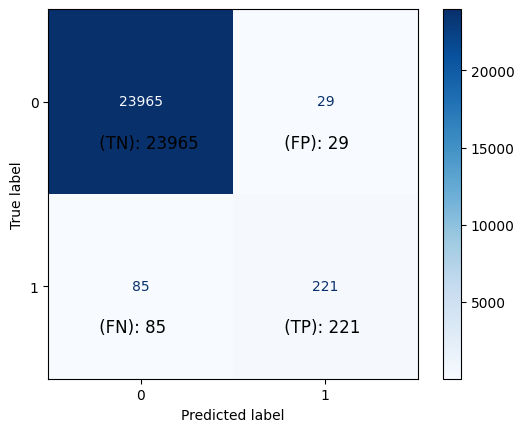

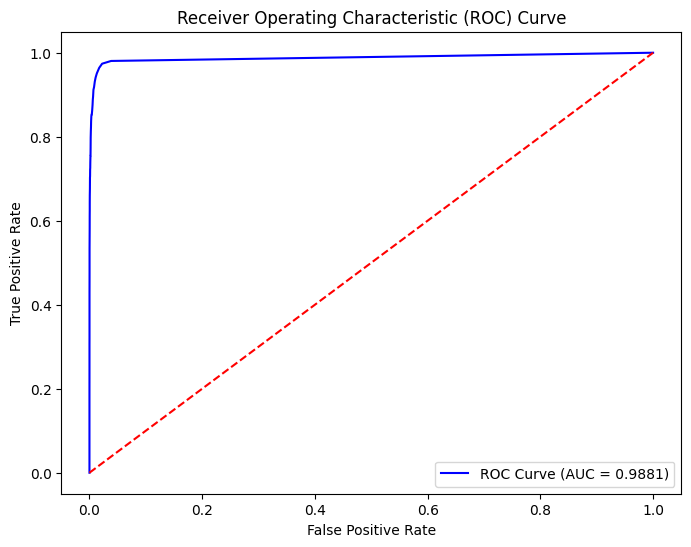

            merchant  Predicted_Fraud
8069   'M1946091778'                0
45057   'M348934600'                0
52586  'M1823072687'                0
77495   'M348934600'                0
64642   'M348934600'                0
29380   'M151143676'                0
53155   'M348934600'                0
49748  'M1823072687'                0
68726  'M1198415165'                0
33985  'M1823072687'                0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/HSBC HACK/test_hsbc_df.csv'
df = pd.read_csv(file_path)

# Assuming 'fraud' is the target variable and the rest are features
X = df.drop(columns=['fraud'])
y = df['fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Leave the remaining columns unchanged
)

# Create a pipeline that includes preprocessing and the Random Forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))  # Reduced number of trees for faster processing
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Apply the pipeline to the test data to make predictions
y_pred = pipeline.predict(X_test)

# Generate the classification report for the test data
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

# Display the classification report
print(report_df)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_)
disp.plot(cmap='Blues')

# Add labels for True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()
plt.text(-0.25, 1.25, f' (FN): {fn}', fontsize=12, color='black')
plt.text(0.75, 1.25, f' (TP): {tp}', fontsize=12, color='black')
plt.text(-0.25, 0.25, f' (TN): {tn}', fontsize=12, color='black')
plt.text(0.75, 0.25, f' (FP): {fp}', fontsize=12, color='black')

# Calculate and display the AUC-ROC score
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Fraud'] = y_pred
if 'merchant' in X_test_with_predictions.columns:
    # Show a sample of predictions by merchant
    merchant_predictions = X_test_with_predictions[['merchant', 'Predicted_Fraud']]
    print(merchant_predictions.sample(10))  # Display 10 random samples



Potential Anomalies:
       merchant  frequency         sum         mean    z_freq     z_sum  \
17  M1823072687      41033  1102352.00    26.865011  5.641940  5.542588   
29   M348934600      27775   750931.93    27.036253  3.742475  3.669695   
39   M732195782         88   203949.98  2317.613409 -0.224225  0.754555   

      z_mean  
17 -0.521756  
29 -0.521284  
39  5.788553  


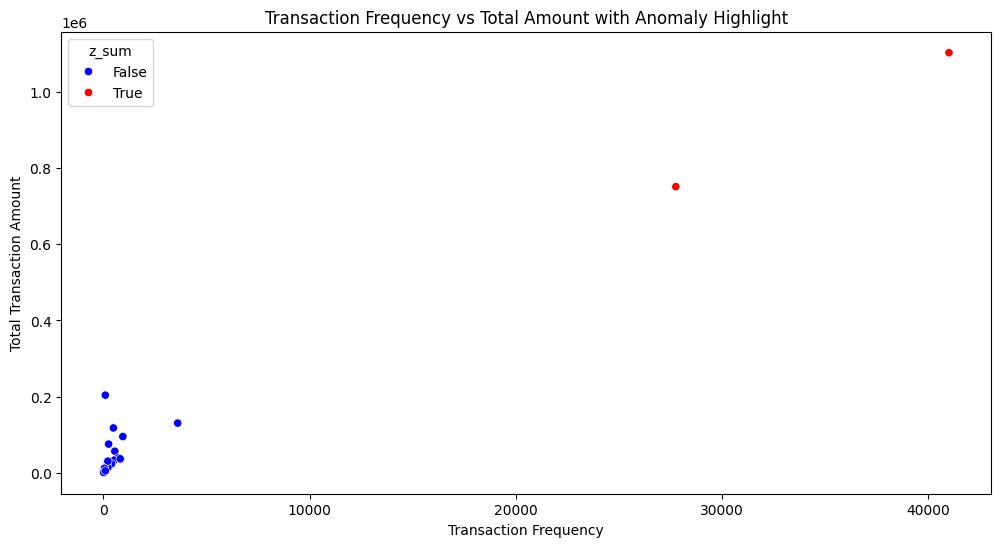

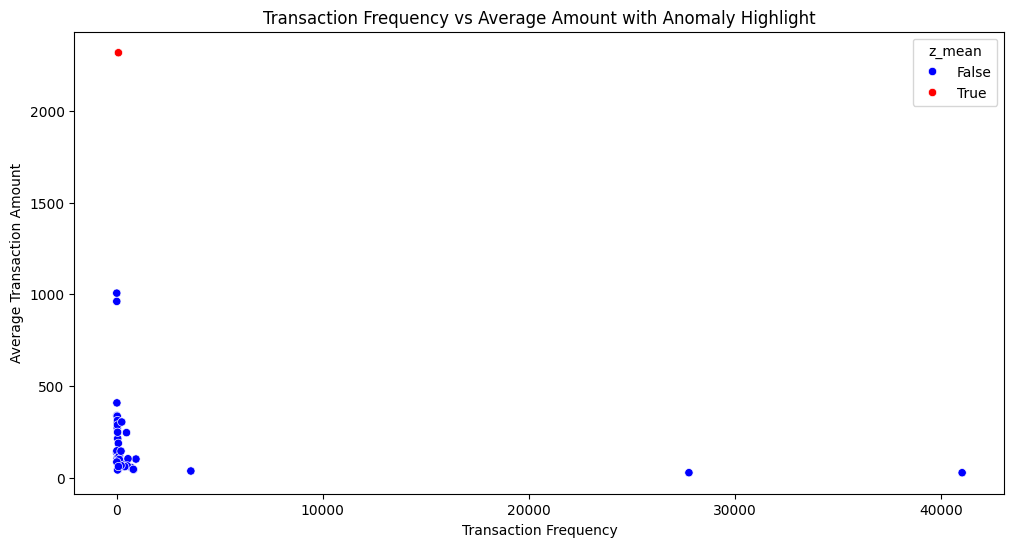

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data based on the provided information
data = {
    'merchant': [
       'M1053599405', 'M117188757', 'M1198415165', 'M1294758098', 'M1313686961',
        'M1352454843', 'M1353266412', 'M1400236507', 'M1416436880', 'M151143676',
        'M1535107174', 'M1600850729', 'M1649169323', 'M17379832', 'M1741626453',
        'M1748431652', 'M1788569036', 'M1823072687', 'M1842530320', 'M1872033263',
        'M1873032707', 'M1888755466', 'M1913465890', 'M1946091778', 'M2011752106',
        'M2080407379', 'M209847108', 'M2122776122', 'M348875670', 'M348934600',
        'M349281107', 'M3697346', 'M45060432', 'M480139044', 'M495352832',
        'M50039827', 'M547558035', 'M677738360', 'M692898500', 'M732195782',
        'M78078399', 'M840466850', 'M855959430', 'M857378720', 'M85975013',
        'M923029380', 'M933210764', 'M97925176', 'M980657600'
    ],
    'frequency': [
         939, 3, 197, 26, 76, 45, 15, 112, 30, 825, 270, 367, 145, 53, 84, 42, 23, 41033, 106, 66,
        31, 110, 551, 707, 32, 7, 522, 42, 13, 27775, 394, 41, 71, 480, 8, 118, 126, 45, 128, 88,
        216, 213, 811, 14, 3603, 49, 11, 88, 249
    ],
    'sum': [
        95294.14, 411.10, 17091.24, 7778.25, 3389.90, 4712.45, 5076.22, 12516.34, 3121.48, 35839.59,
        20558.15, 22187.98, 18073.77, 11305.07, 15728.72, 3299.63, 2409.07, 1102352.00, 10112.12, 7467.58,
        10380.88, 14530.46, 56887.40, 39072.70, 8680.79, 7044.56, 33439.68, 13091.75, 1900.39, 750931.93,
        23782.92, 11764.65, 6743.96, 117841.03, 7690.39, 13694.50, 9075.38, 1890.60, 12724.81, 203949.98,
        14305.13, 30786.68, 36847.92, 5708.85, 130631.49, 12130.82, 937.73, 5325.75, 75564.34
    ],
    'mean': [
        101.484707, 137.033333, 86.757563, 299.163462, 44.603947, 104.721111, 338.414667, 111.753036, 104.049333, 43.441927,
        76.141296, 60.457711, 124.646690, 213.303208, 187.246667, 78.562619, 104.742174, 26.865011, 95.397358, 113.145152,
        334.867097, 132.095091, 103.243920, 55.265488, 271.274687, 1006.365714, 64.060690, 311.708333, 146.183846, 27.036253,
        60.362741, 286.942683, 94.985352, 245.502146, 961.298750, 116.055085, 72.026825, 42.013333, 99.412578, 2317.613409,
        66.227454, 144.538404, 45.435166, 407.775000, 36.256311, 247.567755, 85.248182, 60.519886, 303.471245
    ]
}

df = pd.DataFrame(data)

# Step 1: Calculate summary statistics
mean_freq = df['frequency'].mean()
mean_sum = df['sum'].mean()
mean_avg = df['mean'].mean()

median_freq = df['frequency'].median()
median_sum = df['sum'].median()
median_avg = df['mean'].median()

# Step 2: Identify outliers using Z-scores or IQR
df['z_freq'] = (df['frequency'] - df['frequency'].mean()) / df['frequency'].std()
df['z_sum'] = (df['sum'] - df['sum'].mean()) / df['sum'].std()
df['z_mean'] = (df['mean'] - df['mean'].mean()) / df['mean'].std()

# Assume Z-score thresholds beyond which data is considered an anomaly
anomaly_threshold = 3  # Typically, a Z-score beyond ±3 is considered an anomaly

anomalies = df[(df['z_freq'].abs() > anomaly_threshold) | (df['z_sum'].abs() > anomaly_threshold) | (df['z_mean'].abs() > anomaly_threshold)]

# Display potential anomalies
print("Potential Anomalies:")
print(anomalies[['merchant', 'frequency', 'sum', 'mean', 'z_freq', 'z_sum', 'z_mean']])

# Step 3: Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='frequency', y='sum', data=df, hue=(df['z_sum'].abs() > anomaly_threshold), palette={False: 'blue', True: 'red'})
plt.title('Transaction Frequency vs Total Amount with Anomaly Highlight')
plt.xlabel('Transaction Frequency')
plt.ylabel('Total Transaction Amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='frequency', y='mean', data=df, hue=(df['z_mean'].abs() > anomaly_threshold), palette={False: 'blue', True: 'red'})
plt.title('Transaction Frequency vs Average Amount with Anomaly Highlight')
plt.xlabel('Transaction Frequency')
plt.ylabel('Average Transaction Amount')
plt.show()


              precision    recall  f1-score        support
0              0.997449  0.998877  0.998162  152243.000000
1              0.895221  0.789730  0.839173    1850.000000
accuracy       0.996366  0.996366  0.996366       0.996366
macro avg      0.946335  0.894303  0.918668  154093.000000
weighted avg   0.996221  0.996366  0.996253  154093.000000


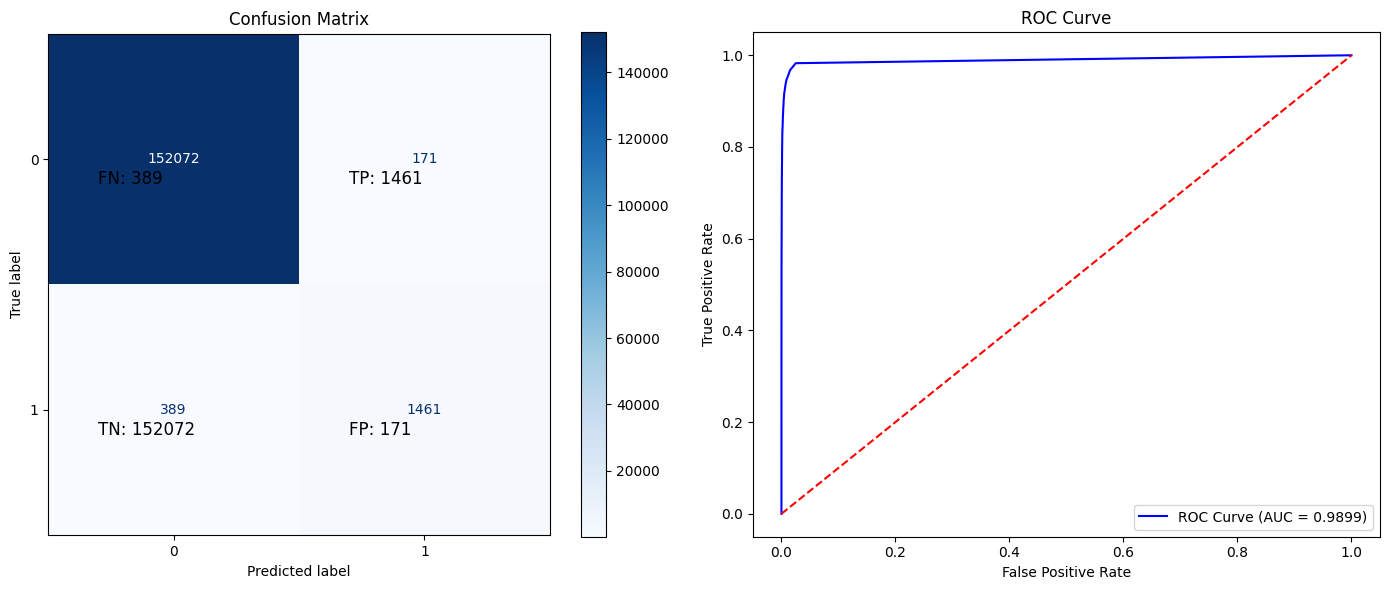

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/HSBC HACK/test_hsbc_df.csv'
df = pd.read_csv(file_path)

# Assuming 'fraud' is the target variable and the rest are features
X = df.drop(columns=['fraud'])
y = df['fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Leave the remaining columns unchanged
)

# Create a pipeline that includes preprocessing and the Random Forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))  # Reduced number of trees for faster processing
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Apply the pipeline to the test data to make predictions
y_pred = pipeline.predict(X_test)

# Generate the classification report for the test data
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

# Display the classification report
print(report_df)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the AUC-ROC score
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
auc_score = roc_auc_score(y_test, y_prob)

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Create a combined chart
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_).plot(cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')

# Annotate the confusion matrix with TN, FP, FN, and TP
tn, fp, fn, tp = conf_matrix.ravel()
ax[0].text(-0.3, 1.1, f'TN: {tn}', fontsize=12, color='black')
ax[0].text(0.7, 1.1, f'FP: {fp}', fontsize=12, color='black')
ax[0].text(-0.3, 0.1, f'FN: {fn}', fontsize=12, color='black')
ax[0].text(0.7, 0.1, f'TP: {tp}', fontsize=12, color='black')

# Plot the ROC Curve
ax[1].plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
ax[1].plot([0, 1], [0, 1], color='red', linestyle='--')
ax[1].set_title('ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()
plt.show()
